In [3]:
import pandas as pd
import numpy as np
import re

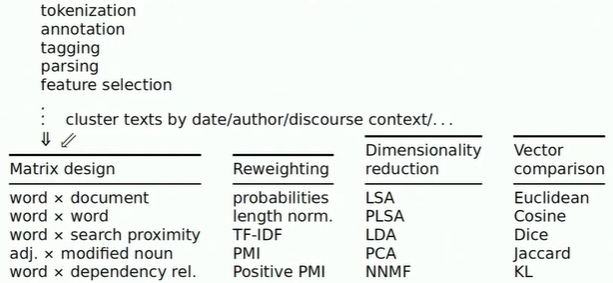

In [4]:
data= pd.read_csv(r'./data/one_item_amazon_reviews.csv')
# pure_texts=data['Text']

In [5]:
## Handle contraction words
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/:<>~/\\]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Optionally, remove stop words
#     if remove_stopwords:
#         text = text.split()
#         stops = set(stopwords.words("english"))
#         text = [w for w in text if not w in stops]
#         text = " ".join(text)

    return text
pure_texts=[clean_text(review) for review in data['Text']]
data['pure_texts']=pure_texts

## Tokenizer

In [6]:
#white space
from nltk.tokenize import WhitespaceTokenizer

ws_token=data['pure_texts'].apply(lambda x: WhitespaceTokenizer().tokenize(x))

### treebank tokenizer (it splits tokens based on white space and punctuation.)
from nltk.tokenize import word_tokenize
tb_token=data['pure_texts'].apply(lambda x: word_tokenize(x))

## better use some custom version of tokenizer, such as nltk.tokenize.casual.TweetTokenize
## better in this example: '"This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"'
from nltk.tokenize import TweetTokenizer
tw_token =data['pure_texts'].apply(lambda x: TweetTokenizer().tokenize(x))


## Part-of-speech-tagging

In [7]:
from nltk.tag import pos_tag
pos_token=tw_token.apply(lambda x: pos_tag(x))
pos_token[:1]

0    [(i, NN), (love, VBP), (these, DT), (cookies, ...
Name: pure_texts, dtype: object

In [8]:
## change the pos_tag of default into the tags that lemmatizer can understand:
def pos_change(pos):
    if pos.startswith('J'):
        return 'a'
    elif pos.startswith('V'):
        return 'v'
    elif pos.startswith('R'):
        return 'r'
    else:
        return 'n'
def replace_pos_tag_with_lem_pos(list_of_tuples):
    return [(tp[0], pos_change(tp[1])) for tp in list_of_tuples]
from nltk.tag import pos_tag
replace_pos_tag_with_lem_pos(pos_tag(word_tokenize('I love you a lot')))
pos_token=tw_token.apply(lambda x: replace_pos_tag_with_lem_pos(pos_tag(x)))
pos_token[:2]

0    [(i, n), (love, v), (these, n), (cookies, n), ...
1    [(quaker, n), (soft, a), (baked, v), (oatmeal,...
Name: pure_texts, dtype: object

## Stemming / Lemmatizing

In [9]:
#Lemmatizing

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("worst", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))
print(lemmatizer.lemmatize("!",'v'))
print(lemmatizer.lemmatize("HAPPY",'a'))

cat
cactus
goose
rock
python
good
bad
run
run
!
HAPPY


In [10]:
##Stemming 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

porter = PorterStemmer()
lancaster=LancasterStemmer()
englishStemmer=SnowballStemmer("english")

#proide a word to be stemmed
print("Porter Stemmer")
print(porter.stem("cats"))
print(porter.stem("trouble"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))
print(porter.stem("having"))
print(porter.stem("better"))

print("Lancaster Stemmer")
print(lancaster.stem("cats"))
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))
print(lancaster.stem("having"))
print(lancaster.stem("better"))

print("Snowball Stemmer")
print(englishStemmer.stem("cats"))
print(englishStemmer.stem("trouble"))
print(englishStemmer.stem("troubling"))
print(englishStemmer.stem("troubled"))
print(englishStemmer.stem("having"))
print(englishStemmer.stem("better"))

Porter Stemmer
cat
troubl
troubl
troubl
have
better
Lancaster Stemmer
cat
troubl
troubl
troubl
hav
bet
Snowball Stemmer
cat
troubl
troubl
troubl
have
better


In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lem_token=pos_token.apply(lambda x: [lemmatizer.lemmatize(w_tuple[0], w_tuple[1]) for w_tuple in x])

In [12]:
lem_token[:2]

0    [i, love, these, cooky, not, only, be, they, h...
1    [quaker, soft, bake, oatmeal, cooky, with, rai...
Name: pure_texts, dtype: object

## word by document matrix

In [13]:
from sklearn.feature_extraction.text import CountVectorizer ## Count of words in word-by-document matrix
from sklearn.feature_extraction.text import TfidfTransformer ## tfidf of words in in word-by-document matrix

cv=CountVectorizer()
 
#convert token back to review texts (normalized version)
lem_texts=[]
for review in lem_token:
    normalized=" ".join(word for word in review)
    lem_texts.append(normalized)
word_count_vector=cv.fit_transform(lem_texts)    
word_count_vector.shape  #913 reviews, 5919 unique words in total

(913, 2235)

In [14]:
## inverse-document frequency (IDF): how common words are in general.
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
df_idf = pd.DataFrame({'features':cv.get_feature_names(), 'idf_weights_0': tfidf_transformer.idf_ })
# df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
df_idf=df_idf.sort_values(by=['idf_weights_0']) # sort ascending
df_idf_0=df_idf.reset_index(drop=True)
df_idf_0[:5]
## lower the idf, less unique the term is

,features,idf_weights_0
0,be,1.092797
1,and,1.166259
2,the,1.343940
3,soft,1.509732
4,my,1.522565


In [15]:
# TF-IDF(term frequency * inverse document frequency): how representative the word is in this document.
tf_idf_vector=tfidf_transformer.transform(word_count_vector)
feature_names = cv.get_feature_names()
tf_idf_vector.T.todense().shape
np.array(tf_idf_vector.T.todense())  ## that's term by document matrix with tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
tf_idf_vector.T.todense().shape

(2235, 913)

In [17]:
df_tfidf = pd.DataFrame(np.array(tf_idf_vector.T.todense()), index=cv.get_feature_names(),
                        columns=['doc_'+str(i) for i in range(1, 914)])
# df_tfidf

In [18]:
df_tfidf['doc_1'][df_tfidf['doc_1']!=0].sort_values(ascending=False)[:3]  ##top 3 most representative words in the first review document

list       0.369079
add        0.365345
grocery    0.358382
Name: doc_1, dtype: float64

## word by word matrix

In [19]:
vect = CountVectorizer(stop_words=None, token_pattern=r"(?u)\b\w+\b|!|\?|\"|\,|\.|\-|\<|\>|\/|\:|\'")  ## it will include more tokens like 'i', 'a'
word_count_vector=vect.fit_transform(lem_texts)  
word_count_vector.shape

(913, 2264)

In [20]:
# Create a co-occurrence matrix of unique words and initialize them to zero
uniq_wrds = vect.get_feature_names()
n = len(uniq_wrds)
co_mat = np.zeros((n,n))
co_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
window_len = 3 ## total
def update_co_mat(x):   
    # Get all the words in the sentence and store it in an array wrd_lst
    wrd_list = x.split(' ')
    
    # Consider each word as a focus word
    for focus_wrd_indx, focus_wrd in enumerate(wrd_list):
        focus_wrd = focus_wrd.lower()
        # Get the indices of all the context words for the given focus word
        for contxt_wrd_indx in range((max(0,focus_wrd_indx - window_len)),(min(len(wrd_list),focus_wrd_indx + window_len +1))):                        
            # If context words are in the unique words list
            if wrd_list[contxt_wrd_indx] in uniq_wrds: 
                # To identify the row number, get the index of the focus_wrd in the uniq_wrds list
                co_mat_row_indx = uniq_wrds.index(focus_wrd)
                # To identify the column number, get the index of the context words in the uniq_wrds list
                co_mat_col_indx = uniq_wrds.index(wrd_list[contxt_wrd_indx])
                # Update the respective columns of the corresponding focus word row
                co_mat[co_mat_row_indx][co_mat_col_indx] += 1

In [22]:
for review in lem_texts:
    update_co_mat(review)
print()
print("Co-occurrence Matrix: ")
print(co_mat)


Co-occurrence Matrix: 
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  1. ...  0.  0.  0.]
 [ 0.  1. 30. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]


In [23]:
co_mat.shape

(2264, 2264)

In [24]:
##visualize my word-to-word matrix:
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# import seaborn as sns
# figure(figsize=(15,10))
# df_cm1 = pd.DataFrame(co_mat, index=uniq_wrds, columns=uniq_wrds)
# cf_hm1 = sns.heatmap(df_cm1, annot=True, xticklabels=uniq_wrds, yticklabels=uniq_wrds, linewidths=.5, linecolor='black', cmap="Blues")
# plt.yticks(rotation=0)
# plt.title('Co-occurrence Matrix')
df_w_by_w = pd.DataFrame(co_mat, index=uniq_wrds,
                        columns=uniq_wrds)
# df_w_by_w

## Vector Normalization

In [25]:
#L2 normalization
import sklearn
l2_co_mat=sklearn.preprocessing.normalize(co_mat, norm='l2')

In [26]:
#observed / expected: so if the true value is greater than expected, I want to amplify the thing that departs from the expected defaults
def row_column_sum(arr):
    r,c=arr.shape
    rSum=[]
    cSum=[]
    row_sum = 0
    column_sum= 0
    for i in range(r): 
        for j in range(c): 
            # Add the element  
            row_sum += arr[j][i]
            column_sum+= arr[i][j]
        # Reset the sum  
        rSum.append(row_sum)
        cSum.append(column_sum)
        row_sum = 0
        column_sum= 0
    return rSum, cSum
  

def ob_over_expect_co_mat(co_mat):
    rSum, cSum= row_column_sum(co_mat)
    r,c=co_mat.shape
    o_e_co_mat= np.zeros([r,c])
    total_sum= sum(rSum)
    for i in range(r) : 
        for j in range(c):
            o_e_co_mat[i][j]= co_mat[i][j]/((float(rSum[i]) * float(cSum[j]))/total_sum)
    return o_e_co_mat

In [27]:
o_e_co_mat= ob_over_expect_co_mat(co_mat)
df_w_by_w = pd.DataFrame(o_e_co_mat, index=uniq_wrds,
                        columns=uniq_wrds)
# df_w_by_w

In [28]:
math.log??

Object `math.log` not found.


In [29]:
## PMI and PPMI
import math
r,c=o_e_co_mat.shape
pmi_co_mat= np.zeros([r,c])
for i in range(r):
    for j in range(c):
        if o_e_co_mat[i][j]==0:
            pmi_co_mat[i][j]=0
        else:
            pmi_co_mat[i][j]= math.log(o_e_co_mat[i][j])

ppmi_co_mat= np.zeros([r,c])
for i in range(r):
    for j in range(c):
        if o_e_co_mat[i][j]<=1:
            ppmi_co_mat[i][j]=0
        else:
            ppmi_co_mat[i][j]= math.log(o_e_co_mat[i][j])
            
df_w_by_w = pd.DataFrame(pmi_co_mat, index=uniq_wrds,
                        columns=uniq_wrds)
# df_w_by_w

In [30]:
len(co_mat.sum(axis=1))

2264

In [31]:
from scipy import sparse
from scipy.sparse import linalg 
##kaggle implementation of PMI and PMI variant
total_sum = co_mat.sum()
# assert(sum(skipgram_counts.values())==num_skipgrams)

pmi_dat_values = []    # pointwise mutual information
ppmi_dat_values = []   # positive pointwise mutial information
spmi_dat_values = []   # smoothed pointwise mutual information
sppmi_dat_values = []  # smoothed positive pointwise mutual information
ttest_reweight_values = []


# reusable quantities

# sum_over_rows[ii] = sum_over_words[ii] = wwcnt_mat.getcol(ii).sum()
sum_over_words = np.array(co_mat.sum(axis=0)).flatten()
# sum_over_cols[ii] = sum_over_contexts[ii] = wwcnt_mat.getrow(ii).sum()
sum_over_contexts = np.array(co_mat.sum(axis=1)).flatten()

# smoothing
alpha = 0.75
sum_over_words_alpha = sum_over_words**alpha
nca_denom = np.sum(sum_over_words_alpha)



ii = 0
r,c=co_mat.shape

for i in range(r):
    for j in range(c):

        ii += 1
        if ii % 1000000 == 0:
            print(f'finished {ii/len(co_mat.flatten()):.2%} of coccurences')

        # here we have the following correspondance with Levy, Goldberg, Dagan
        #========================================================================
        #   num_skipgrams = |D|
        #   nwc = sg_count = #(w,c)
        #   Pwc = nwc / num_skipgrams = #(w,c) / |D|
        #   nw = sum_over_cols[tok_word]    = sum_over_contexts[tok_word] = #(w)
        #   Pw = nw / num_skipgrams = #(w) / |D|
        #   nc = sum_over_rows[tok_context] = sum_over_words[tok_context] = #(c)
        #   Pc = nc / num_skipgrams = #(c) / |D|
        #
        #   nca = sum_over_rows[tok_context]^alpha = sum_over_words[tok_context]^alpha = #(c)^alpha
        #   nca_denom = sum_{tok_content}( sum_over_words[tok_content]^alpha )

        Pwc = co_mat[i][j] / total_sum
        Pw = sum_over_words[i] / total_sum
        Pc = sum_over_contexts[j]/total_sum

        Pca = sum_over_words_alpha[i] / nca_denom

        # note 
        # pmi = log {#(w,c) |D| / [#(w) #(c)]} 
        #     = log {nwc * num_skipgrams / [nw nc]}
        #     = log {P(w,c) / [P(w) P(c)]} 
        #     = log {Pwc / [Pw Pc]}
        pmi = (0 if Pwc==0 else np.log2(Pwc/(Pw*Pc)))   
        ppmi = max(pmi, 0)
        spmi = (0 if Pwc==0 else np.log2(Pwc/(Pw*Pca)))
        sppmi = max(spmi, 0)
        
        ttest_reweight_values.append((Pwc-Pw*Pc)/((Pw*Pc)**0.5))

        pmi_dat_values.append(pmi)
        ppmi_dat_values.append(ppmi)
        spmi_dat_values.append(spmi)
        sppmi_dat_values.append(sppmi)
        
ttest_reweight_mat= np.array(ttest_reweight_values).reshape(2264,2264)
pmi_mat=np.array(pmi_dat_values).reshape(2264,2264)
ppmi_mat = np.array(ppmi_dat_values).reshape(2264,2264)
spmi_mat = np.array(spmi_dat_values).reshape(2264,2264)
sppmi_mat = np.array(sppmi_dat_values).reshape(2264,2264)

print('done')

finished 19.51% of coccurences
finished 39.02% of coccurences
finished 58.53% of coccurences
finished 78.04% of coccurences
finished 97.55% of coccurences
done


#### this two ways of making PMI, t-test reweighting and PMI variant is similar, the result is different becuase of log2 and log

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


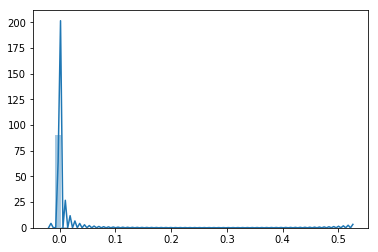

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##T-test reweighting:
sns.distplot(ttest_reweight_mat.flatten())

(array([2.400000e+02, 5.438000e+03, 5.068576e+06, 2.186100e+04,
        1.369300e+04, 7.092000e+03, 3.955000e+03, 2.045000e+03,
        1.419000e+03, 1.377000e+03]),
 array([-3.41038085, -2.07529153, -0.74020221,  0.59488711,  1.92997643,
         3.26506575,  4.60015507,  5.93524439,  7.27033371,  8.60542303,
         9.94051235]),
 <a list of 10 Patch objects>)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


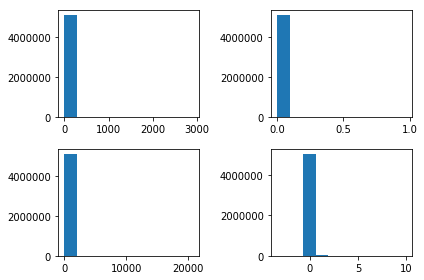

In [36]:
#weighting scheme cell distribution:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2, 2, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0][0].hist(co_mat.flatten())
axs[0][1].hist(l2_co_mat.flatten())
axs[1][0].hist(o_e_co_mat.flatten())
axs[1][1].hist(pmi_co_mat.flatten())

(array([2.016038e+06, 1.583500e+04, 6.124000e+03, 1.954000e+03,
        4.860000e+02, 9.700000e+01, 1.400000e+01, 2.000000e+00,
        4.000000e+00, 1.000000e+00]),
 array([0.        , 0.09055716, 0.18111432, 0.27167148, 0.36222864,
        0.4527858 , 0.54334295, 0.63390011, 0.72445727, 0.81501443,
        0.90557159]),
 <a list of 10 Patch objects>)

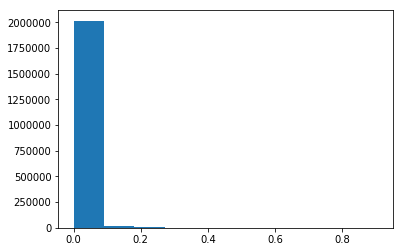

In [37]:
##tf_idf
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(np.array(tf_idf_vector.T.todense()).flatten())

In [ ]:
#Visualization with sklearn.manifold and sklearn.manifold, t_SNE plot would be a good option, which is like a PCA graph but captures local structures well.

## Dimensionality Reduction

## LSA (Latent semantic analysis) on word-by-document matrix
#### it use SVD (Singular Value Decomposition), which is a matrix factorization method that represents a matrix in the product of two matrices.
#### used for finding hidden topics form documents

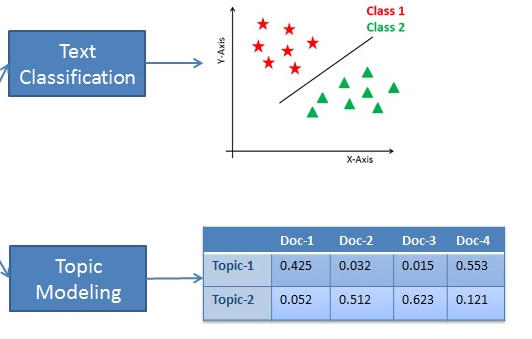

In [52]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

dictionary = corpora.Dictionary(lem_token)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in lem_token]
number_of_topics= 3
nwords=5
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics=number_of_topics, num_words=nwords))

[(0, '0.491*"be" + 0.349*"i" + 0.328*"the" + 0.287*"a" + 0.276*"and"'), (1, '0.488*"i" + -0.478*"br" + 0.296*"it" + -0.296*"the" + 0.241*"my"'), (2, '-0.461*"it" + 0.437*"they" + -0.331*"br" + 0.303*"these" + -0.271*"cookie"')]


In [39]:
from gensim.models import TfidfModel
tf_idf_model = TfidfModel(doc_term_matrix)  # fit model
doc_term_matrix = [tf_idf_model[doc_term_matrix[i]] for i in range(len(doc_term_matrix))]
number_of_topics= 3
nwords=10
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics=number_of_topics, num_words=nwords))

[(0, '0.178*"it" + 0.155*"they" + 0.131*"them" + 0.127*"cookie" + 0.127*"of" + 0.127*"the" + 0.126*"to" + 0.125*"this" + 0.124*"a" + 0.124*"love"'), (1, '0.311*"br" + -0.220*"it" + -0.212*"influenster" + 0.194*"they" + -0.189*"receive" + -0.179*"from" + 0.174*"you" + -0.174*"voxbox" + -0.168*"mom" + -0.156*"sample"'), (2, '-0.587*"br" + 0.218*"great" + 0.211*"kid" + 0.199*"them" + 0.193*"they" + 0.169*"love" + 0.149*"these" + 0.127*"snack" + -0.104*"it" + 0.099*"yummy"')]


In [40]:
lsamodel.print_topics(num_topics=number_of_topics, num_words=nwords)[2]

(2,
 '-0.587*"br" + 0.218*"great" + 0.211*"kid" + 0.199*"them" + 0.193*"they" + 0.169*"love" + 0.149*"these" + 0.127*"snack" + -0.104*"it" + 0.099*"yummy"')

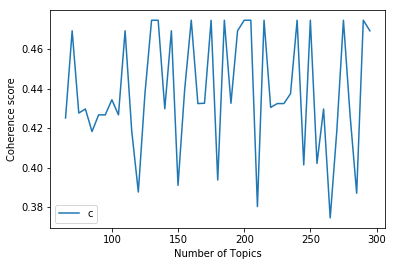

In [41]:
##higher cooccurence score, the more optimal the n_topics are.
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(dictionary,doc_term_matrix,doc_clean, start, stop, step):
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
plot_graph(dictionary,doc_term_matrix, lem_token,start=65, stop=300, step=5)

In [42]:
##gives the topic scores for each document
for doc, as_text in zip(lsamodel[doc_term_matrix][:3], lem_texts[:3]):
    print('\n')
    print(doc, as_text)



[(0, 0.25509729598700887), (1, 0.043959525574793455), (2, 0.15212169419425753)] i love these cooky not only be they healthy but they taste great and be so soft i will definitely add these to my grocery list


[(0, 0.3180636325398821), (1, 0.3142815955045194), (2, -0.40961503144933464)] quaker soft bake oatmeal cooky with raisin be a delicious treat great for anytime of day for example br br at breakfast i have one with a large banana and a cup of coffee and felt i would have a relatively healthy start to the day br br the next day at lunch follow a tuna sandwich i have one with a glass of milk and be satisfy enough to not need a snack before dinner at 6 30 br br the follow night after dinner i have one with the remainder of my glass of wine delicious and again do not feel the need to snack later in the evening br br each cookie be individually package and their texture be soft and moist with just the right amount of sweetness natural flavor use in the making be cinnamon and all spice

In [ ]:
###LSA algorithm is the simplest method which is easy to understand and implement. It also offers better results compared to the vector space model. 
##It is faster compared to other available algorithms because it involves document term matrix decomposition only.
##Latent topic dimension depends upon the rank of the matrix so we can't extend that limit. 
### LSA decomposed matrix is a highly dense matrix, so it is difficult to index individual dimension. 
##LSA unable to capture the multiple meanings of words. It is not easier to implement compared to 
## LDA(latent Dirichlet allocation). It offers lower accuracy than LDA.

In [43]:
import gensim
number_of_topics= 3
nwords=10
ldamodel = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
print(ldamodel.print_topics(num_topics=number_of_topics, num_words=nwords))

[(0, '0.008*"it" + 0.006*"they" + 0.005*"of" + 0.005*"a" + 0.005*"not" + 0.005*"these" + 0.005*"have" + 0.005*"so" + 0.005*"this" + 0.005*"cookie"'), (1, '0.006*"they" + 0.006*"for" + 0.005*"great" + 0.005*"this" + 0.005*"them" + 0.005*"these" + 0.005*"it" + 0.005*"the" + 0.004*"my" + 0.004*"of"'), (2, '0.006*"it" + 0.005*"them" + 0.005*"they" + 0.005*"oatmeal" + 0.005*"love" + 0.005*"to" + 0.005*"good" + 0.005*"in" + 0.005*"the" + 0.004*"quaker"')]


In [44]:
##gives the topic scores for each document
for doc, as_text in zip(ldamodel[doc_term_matrix][:3], lem_texts[:3]):
    print('\n')
    print(doc, as_text)



[(0, 0.83387405), (1, 0.08290531), (2, 0.083220646)] i love these cooky not only be they healthy but they taste great and be so soft i will definitely add these to my grocery list


[(0, 0.7479859), (1, 0.12434203), (2, 0.12767205)] quaker soft bake oatmeal cooky with raisin be a delicious treat great for anytime of day for example br br at breakfast i have one with a large banana and a cup of coffee and felt i would have a relatively healthy start to the day br br the next day at lunch follow a tuna sandwich i have one with a glass of milk and be satisfy enough to not need a snack before dinner at 6 30 br br the follow night after dinner i have one with the remainder of my glass of wine delicious and again do not feel the need to snack later in the evening br br each cookie be individually package and their texture be soft and moist with just the right amount of sweetness natural flavor use in the making be cinnamon and all spice these flavoring give the cooky a real old fashion hom

In [45]:
all_topics=[]
for i in range(3):
    topic= [ldamodel[doc_term_matrix[x]][i][1] for x in range(len(doc_term_matrix))]
    all_topics.append(topic)


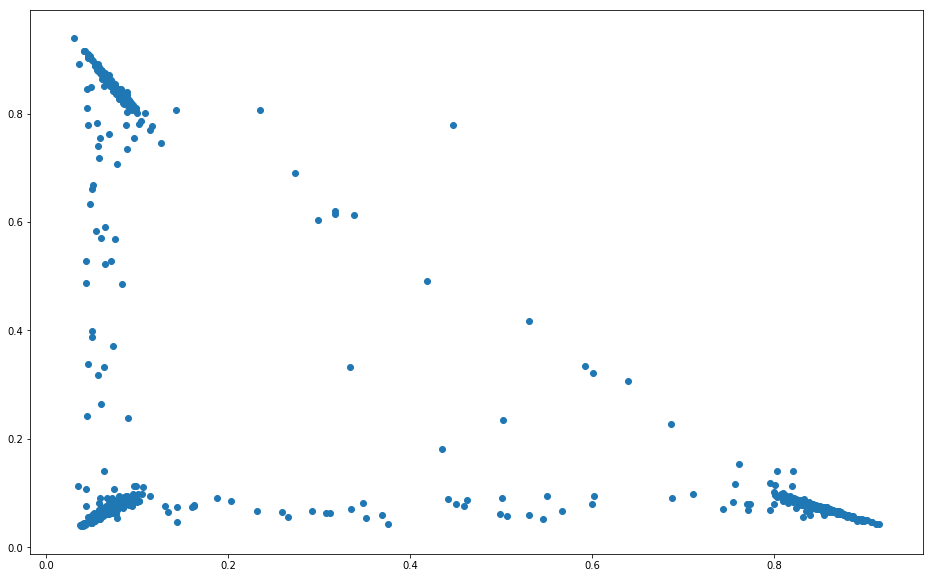

In [46]:
##2-D graph
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
ax= plt.figure(figsize=(16,10))
plt.scatter(
    x=all_topics[1], y=all_topics[2]
#     c=some_lable,
#     cmap='tab10'
)

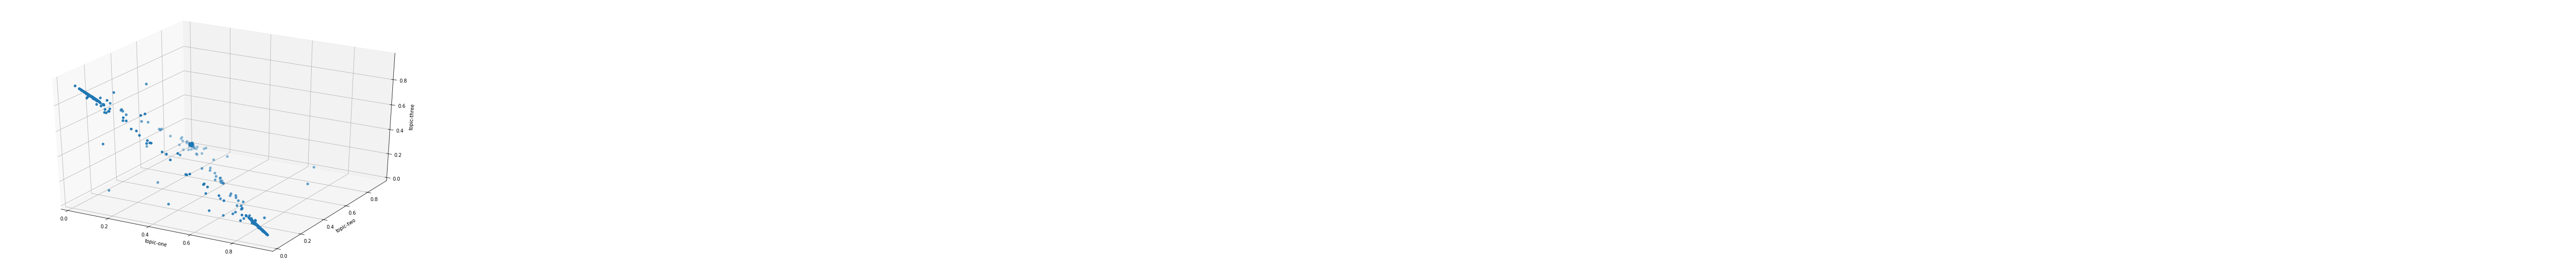

In [47]:
from mpl_toolkits.mplot3d import Axes3D
## 3-D graph
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=all_topics[0],
    ys=all_topics[1],
    zs=all_topics[2],
#     c=some_label,
    cmap='tab10'
)
ax.set_xlabel('topic-one')
ax.set_ylabel('topic-two')
ax.set_zlabel('topic-three')
plt.show()

## PCA

## t-SNE

In [45]:
#use t-SNE to reduce dimensionality on pmi_co_mat  (PMI of word-by-word matrix pmi_co_mat)
import numpy as np
from sklearn.manifold import TSNE
# pmi_co_mat.shape
pmi_co_mat_embedded_by_3 = TSNE(n_components=3).fit_transform(pmi_co_mat)
pmi_co_mat_embedded_by_3.shape

# uniq_wrds

(2264, 3)

In [ ]:
##visualize the words matrix
from mpl_toolkits.mplot3d import Axes3D
pmi_3_df= pd.DataFrame(data=pmi_co_mat_embedded_by_3,    # values
             index=uniq_wrds,   
             columns=['pmi_1', 'pmi_2', 'pmi_3'])

ax = plt.figure(figsize=(16,10)).gca(projection='3d')

ax.scatter(
    xs=pmi_3_df['pmi_1'],
    ys=pmi_3_df['pmi_2'],
    zs=pmi_3_df['pmi_3'],
#     c=some_label,
    cmap='tab10'
)
# for i, word in enumerate(pmi_3_df.index):
#     ax.annotate(word, xy=(pmi_3_df['pmi_1'][i], pmi_3_df['pmi_2'][i]))
#     ax.text(xs+0.2, ys+0.2, zs+0.2, word, fontsize=5)
ax.set_xlabel('pmi_1')
ax.set_ylabel('pmi_2')
ax.set_zlabel('pmi_3')
plt.show()

In [ ]:
#PCA, NMF, PLSA,

## Vector Comparison

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
pmi_pca_300=pca.fit_transform(pmi_co_mat)
pmi_full_df= pd.DataFrame(data=pmi_pca_300,    # values
             index=uniq_wrds)


In [ ]:
from scipy.spatial import distance
distance.euclidean(pmi_full_df.loc['pretty'], pmi_full_df.loc['good'])

In [ ]:
distance.cosine(pmi_full_df.loc['mom'], pmi_full_df.loc['good'])

## Glove / word2vec / fasttext

In [64]:
# !pip install -U mittens
# A fast implementation of GloVe, with optional retrofitting to pre-existing GloVe vectors.

In [63]:
from mittens import GloVe
glove_model = GloVe(n=500, max_iter=300)  # n=500 is the embedding dimension
embeddings = glove_model.fit(co_mat)
# embeddings = glove_model.fit(ttest_reweight_mat)
# larger n, lower the error, higher the correlation

Iteration 300: error 0.42397

In [51]:
ttest_reweight_mat.shape, co_mat.shape

((2264, 2264), (2264, 2264))

In [64]:
embeddings.shape

(2264, 500)

In [89]:
##test how this glove does the correlation with the cooccurence:
glv_df= pd.DataFrame(embeddings, index=uniq_wrds)
def correlation_test(true, pred):
    mask=true>0
    M=pred.dot(pred.T)
    with np.errstate(divide='ignore'):
        log_cooccur = np.log(true)
        log_cooccur[np.isinf(log_cooccur)] = 0.0
        row_prob = np.log(true.sum(axis=1))
        row_log_prob = np.outer(row_prob, np.ones(true.shape[1]))
        prob = log_cooccur - row_log_prob
    return np.corrcoef(prob[mask], M[mask])[0,1]


In [90]:
correlation_test(co_mat, embeddings)

0.08628286722419704

(array([4.40000e+01, 6.43000e+02, 5.11300e+03, 2.92420e+04, 2.95479e+05,
        3.11876e+05, 3.06920e+04, 5.43500e+03, 6.34000e+02, 4.20000e+01]),
 array([-1.04609808, -0.8372971 , -0.62849612, -0.41969513, -0.21089415,
        -0.00209316,  0.20670782,  0.41550881,  0.62430979,  0.83311078,
         1.04191176]),
 <a list of 10 Patch objects>)

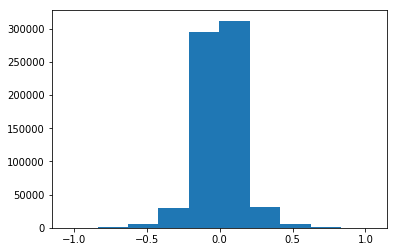

In [91]:
plt.hist(embeddings.flatten())

In [65]:
#word2vec in gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
model = Word2Vec(list(lem_token), size=500, window=5, min_count=1, workers=4)
# model.save("word2vec.model")
##model = gensim.models.Word2Vec.load('word2vec.model')

In [ ]:
## Glove should allow loading an existing model and then futher training on new sentences, but Glove can't.
##there's an implementation of word2vec in tensorflow

## Save results

In [ ]:
# !mkdir useful_embedding_matrics

In [ ]:
##save some word embedding with size 500 in a separate folder
# t-test reweight w*w matrix
# PMI
# Glove
# word2vec

In [84]:
l=[]
for word in uniq_wrds:
    l.append(model.wv[word])
word2vec_mat=np.array(l)
word2vec_mat.shape

(2264, 500)

In [89]:
##LSA dimension reduction on PMI and t-test reweighted data:
# ## here we use scikitlearn's truncated SVD to do the same reduction:
from sklearn.decomposition import TruncatedSVD
svd_500 = TruncatedSVD(n_components=500)
ttest_reweight_mat_500=svd_500.fit_transform(ttest_reweight_mat)
pmi_mat_500=svd_500.fit_transform(pmi_mat)
print(ttest_reweight_mat_500.shape, pmi_mat_500.shape)

(2264, 500) (2264, 500)


In [90]:
glv_mat_500=embeddings
glv_mat_500.shape

(2264, 500)

In [91]:
uniq_wrds

['0',
 '00',
 '1',
 '10',
 '100',
 '11',
 '110',
 '11g',
 '12',
 '12g',
 '12gram',
 '13',
 '14',
 '140',
 '15',
 '150',
 '150mg',
 '15mg',
 '16',
 '17',
 '170',
 '17month',
 '18',
 '1987',
 '1g',
 '1st',
 '1yr',
 '2',
 '20',
 '2012',
 '21',
 '22',
 '25g',
 '27',
 '27g',
 '2g',
 '2nd',
 '3',
 '30',
 '31',
 '34',
 '35',
 '350',
 '370',
 '3boxes',
 '3yo',
 '3yr',
 '4',
 '42',
 '42g',
 '48',
 '49',
 '4g',
 '5',
 '50',
 '5g',
 '5mg',
 '5seconds',
 '5yrs',
 '6',
 '60',
 '61',
 '69',
 '6g',
 '7',
 '70',
 '71',
 '73',
 '8',
 '9',
 '90',
 'a',
 'abhorrent',
 'able',
 'about',
 'above',
 'absolute',
 'absolutely',
 'absolutley',
 'accept',
 'accessible',
 'accident',
 'accompaniment',
 'accompanying',
 'accord',
 'accordingly',
 'account',
 'accurate',
 'accustomed',
 'achieve',
 'acid',
 'acne',
 'acquire',
 'active',
 'actual',
 'actually',
 'acutally',
 'add',
 'added',
 'addict',
 'addictive',
 'addition',
 'additive',
 'admit',
 'adult',
 'advertise',
 'advertised',
 'advise',
 'afford',
 '

In [100]:
np.savetxt('useful_embedding_matrics/word2vec_500.csv', word2vec_mat, delimiter=',')
np.savetxt('useful_embedding_matrics/ttest_reweight_500.csv', ttest_reweight_mat_500, delimiter=',')
np.savetxt('useful_embedding_matrics/pmi_500.csv', pmi_mat_500, delimiter=',')
np.savetxt('useful_embedding_matrics/glove_500.csv', glv_mat_500, delimiter=',')

In [101]:
#save uniq_wrds
import pickle
with open("useful_embedding_matrics/uniq_wrds.txt", "wb") as fp:   #Pickling
    pickle.dump(uniq_wrds, fp)

In [104]:
# test_data = np.loadtxt('useful_embedding_matrics/word2vec_500.csv', delimiter=',')
# with open("useful_embedding_matrics/uniq_wrds.txt", "rb") as fp:   # Unpickling
#     test_words = pickle.load(fp)
# test_words